In [1]:
import glob
import os
from tempfile import NamedTemporaryFile
import shutil
import csv
import preprocess as pp
import matplotlib.pyplot

In [2]:
# files location E= D:\Users\Matan\Downloads\preprocess files test\
# The function gets a row as a dictionary and adds/updates the DB by it
def updateDB(dict):
    # sets all the fields of the Data Base
    fields = ["Animal", "Date", "lfp", "Bandpass", "median", "files recorded",
              "Bad electrodes", "Crosstalk", "possible spiking channels", "Neurons after sorting"]
    # The Data Base's path
    DBPath = "D:\\Users\\Matan\\Downloads\\preprocess files test\\ThemisDB.csv"
    # Creates temporary file
    tempFile = NamedTemporaryFile(mode='w', delete=False, newline='')
    # reads from the DB
    with open(DBPath, 'r')as csvFile:
        writer = csv.DictWriter(tempFile, fieldnames=fields)
        reader = csv.DictReader(csvFile, fieldnames=fields)
        isUpdated = False
        for row in reader:
            # if the row exists in the DB, update it
            if row["Animal"] == str(dict.get("Animal")) and row["Date"] == str(dict.get("Date")):
                for key in dict.keys():
                    row.update({key: dict.get(key)})
                isUpdated = True
            # write the row to the temp file
            writer.writerow(row)
        # if the row does not exist in the DB, add it
        if not isUpdated:
            writer.writerow(dict)
    # close the temp file and replace it in the DB folder
    tempFile.close()
    shutil.move(tempFile.name, DBPath)
    print("ThemisDB.csv has been updated")

In [3]:
# inDir = input("Enter a Wireless Recordings path:")
inDir = "D:\\Users\\Matan\\Downloads\\preprocess files test\\"
# count the DT2 files
DT2Files = [f for f in glob.glob(inDir + "\\*.DT2")]
# create a list of numbers from 0 to the number of DT2 files
fileList = list(range(0, DT2Files.__len__()))
# create a list of electrodes numbers from 2 to 33
elecList = list(range(2, 33))
# example for a basic row Data
basicRow = {"Animal": "K6", "Date": "20/03/2020"}
rangeStr = "-F{0}T{1}".format(fileList[0], fileList[-1])

In [4]:
pp.wirelessToBin(inDir, inDir + "binNew\\", fileList, elecList)
basicRow.update({"files recorded": fileList.__len__()})
updateDB(basicRow)
print(str(fileList.__len__()) + " files has been converted from wireless to bin successfully")

ThemisDB.csv has been updated
6 files has been transformed from wireless to bin successfully


In [5]:
fileFormat = '{0}Elec{1}' + rangeStr + '.bin'
pp.binToLFP(inDir + "binNew\\", inDir + "binLFP\\", fileFormat, elecList)
basicRow.update({"lfp": elecList.__len__()})
updateDB(basicRow)
print(str(elecList.__len__()) + " files has been converted from lfp to bin successfully")

ThemisDB.csv has been updated
31 files has been transformed from lfp to bin successfully


In [6]:
fileFormat = "Elec{0}" + rangeStr + ".bin"
pp.bandpass_filter(inDir + "binNew\\", inDir + "binBand\\", fileFormat, elecList)
basicRow.update({"Bandpass": elecList.__len__()})
updateDB(basicRow)
print(str(elecList.__len__()) + " files has been converted from bandpass to bin successfully")

ThemisDB.csv has been updated
31 files has been transformed from bandpass to bin successfully


In [7]:
def showElectrode(path,number):
    fig, axes = pp.plotBin(path, [10.05,10.2])
    axes.set_title('Electrode '+str(number),fontsize = 20)
    fig.set_size_inches((30,5))
    matplotlib.pyplot.show(fig)

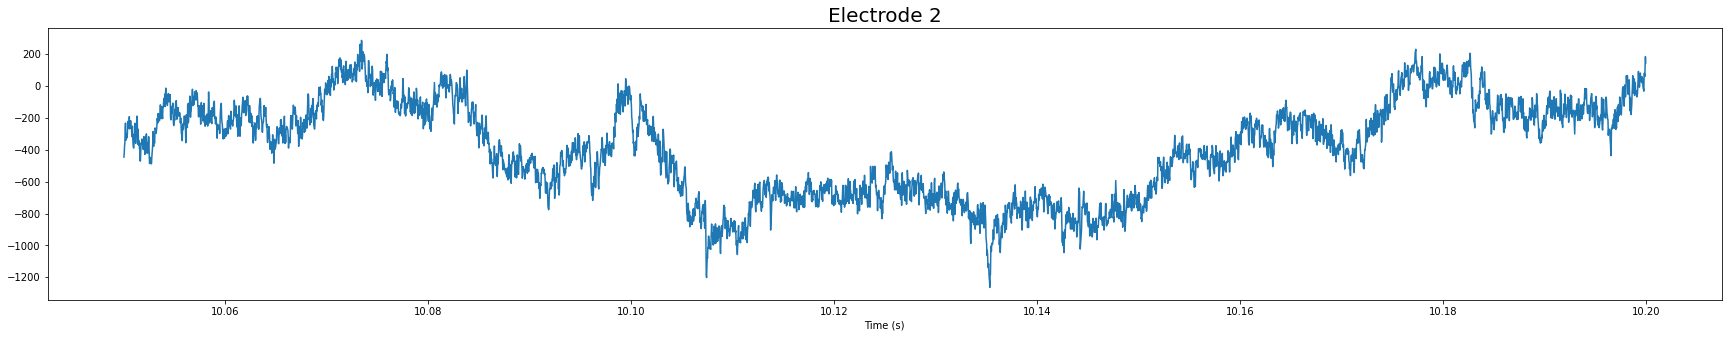

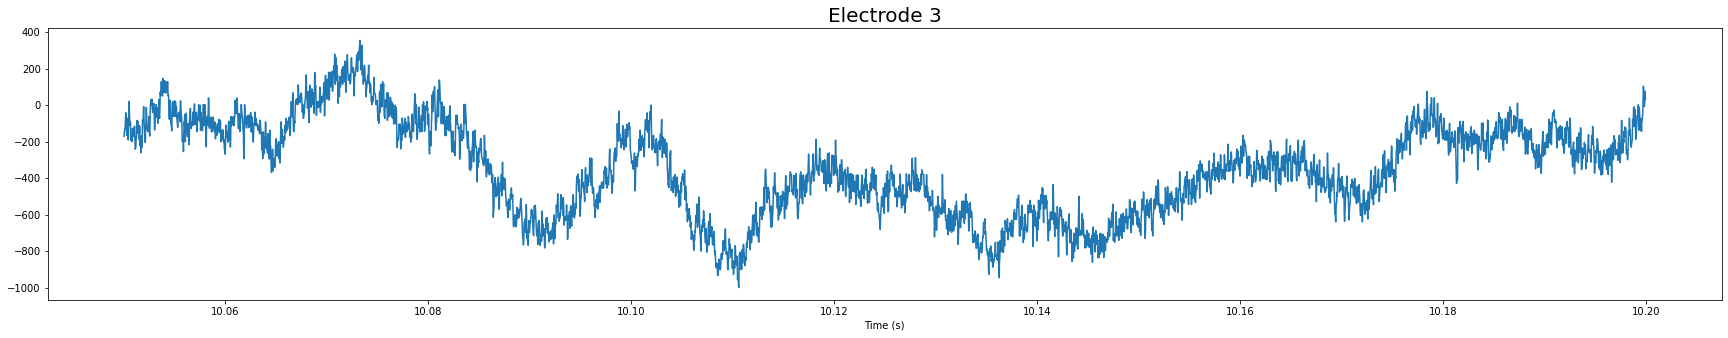

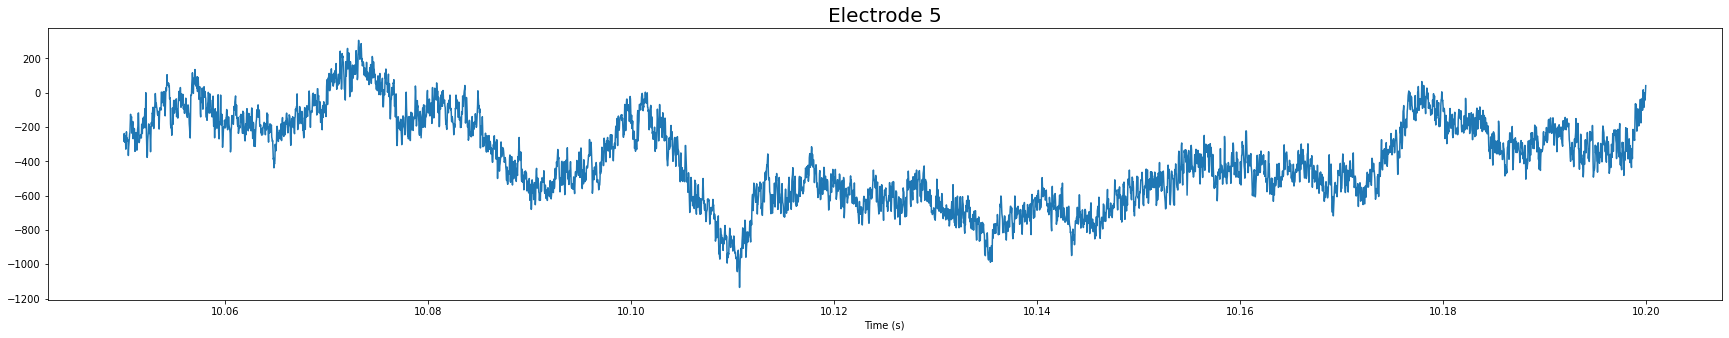

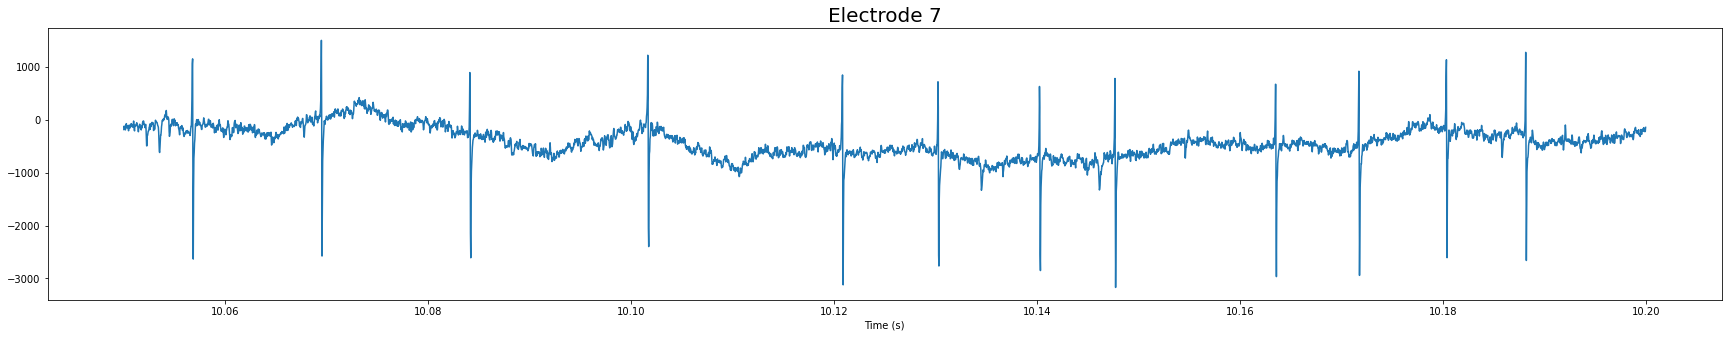

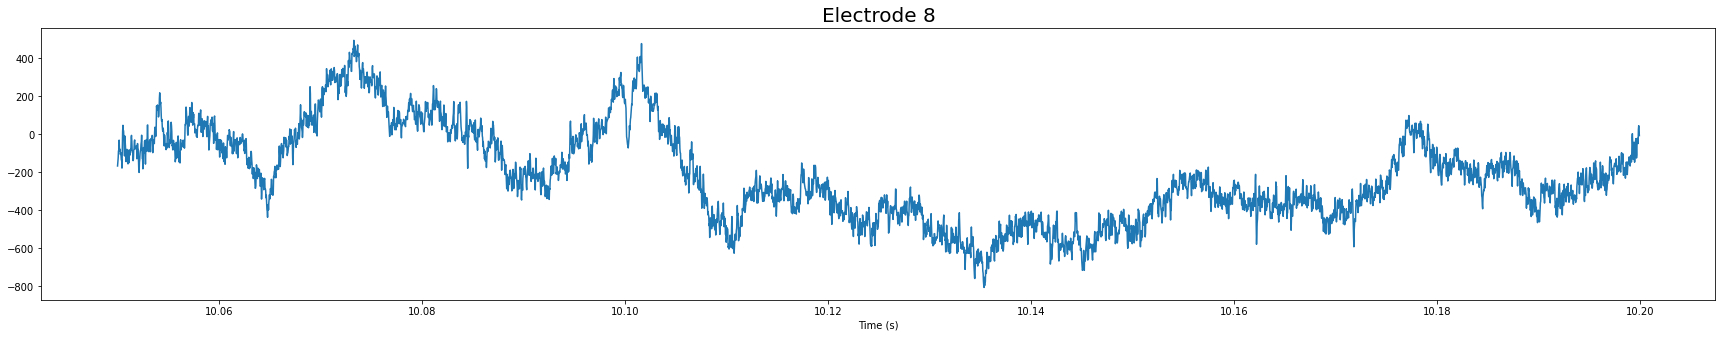

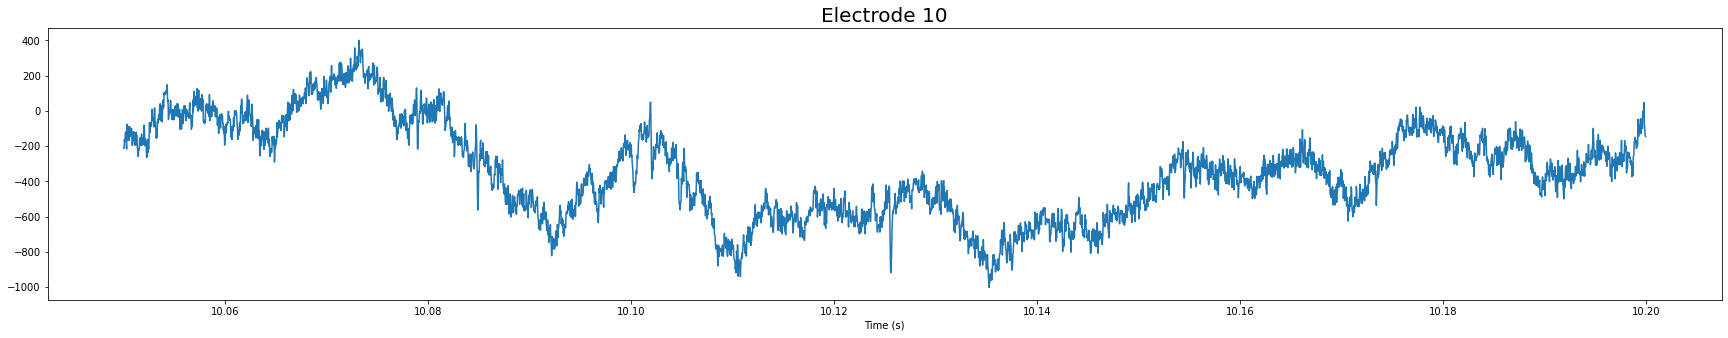

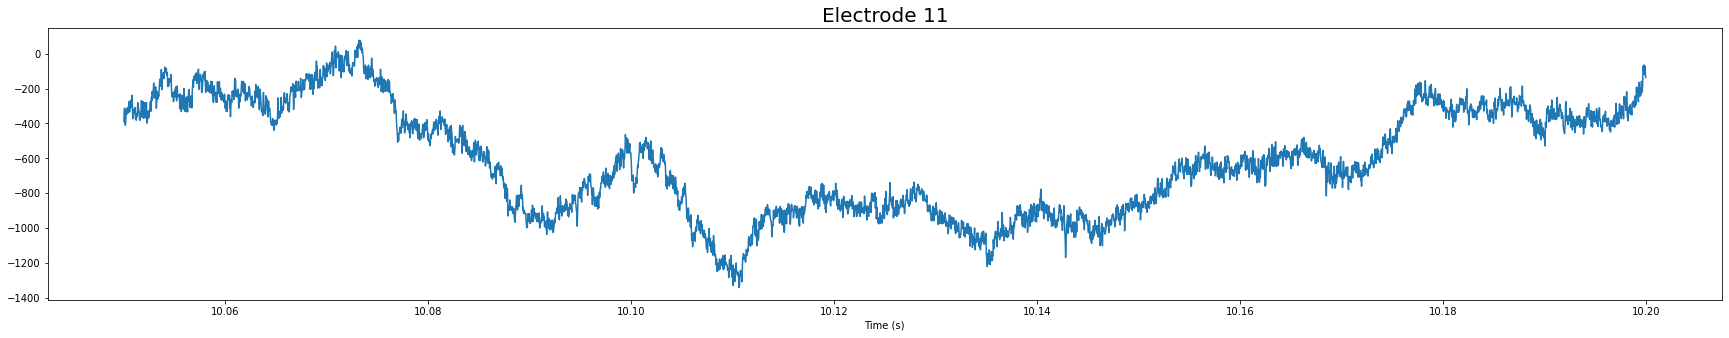

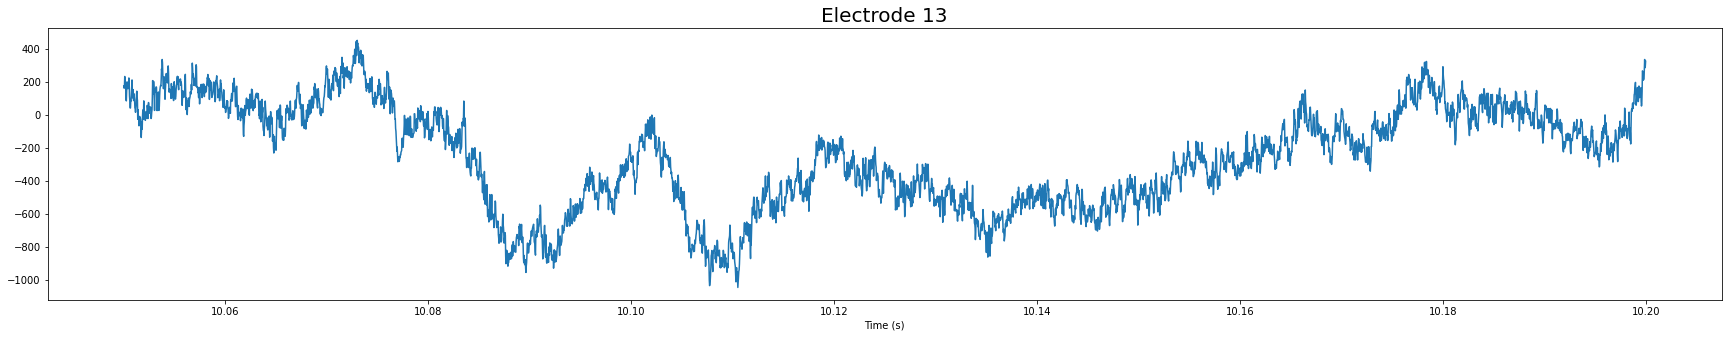

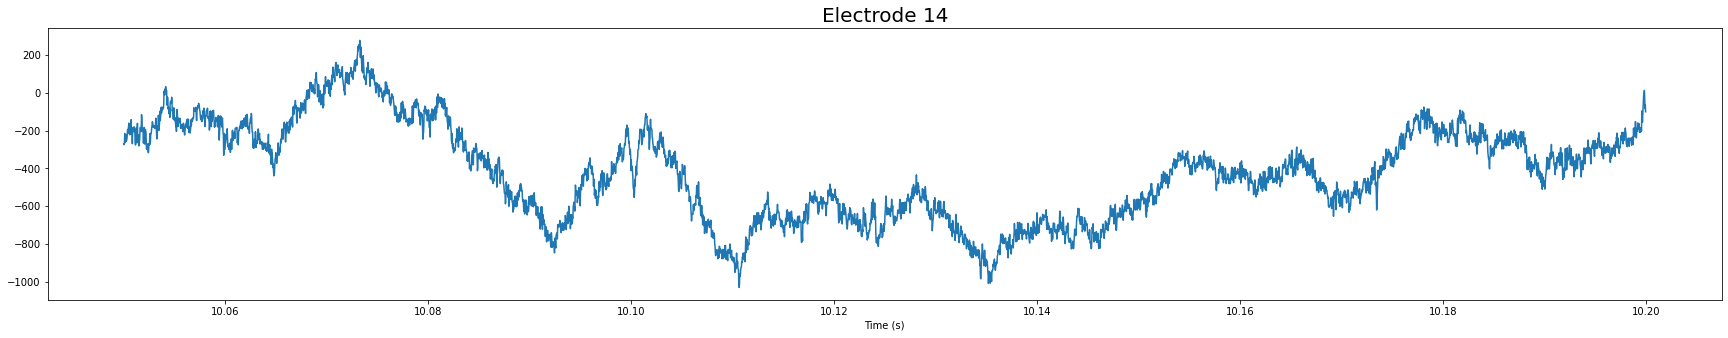

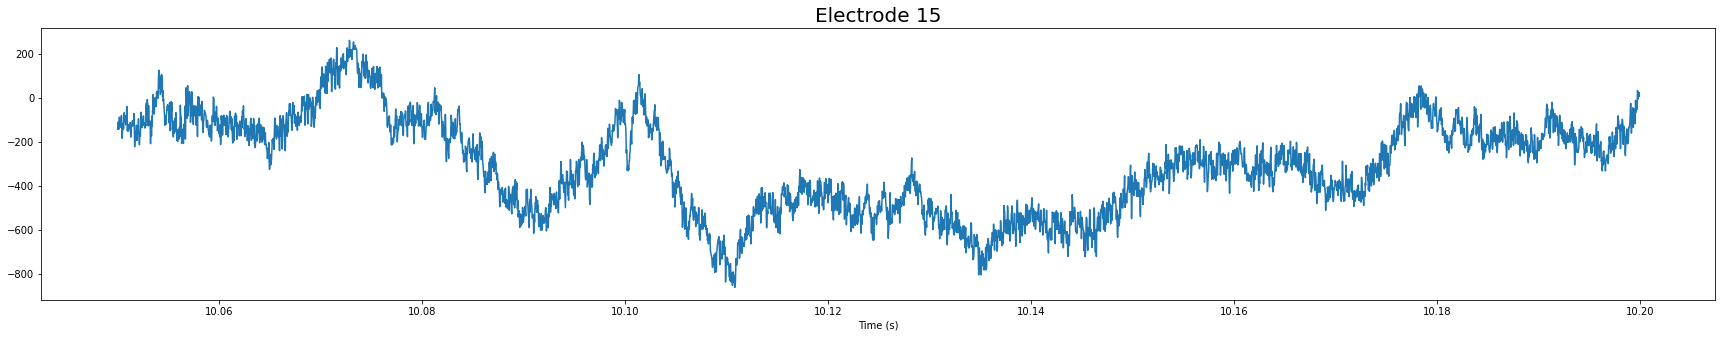

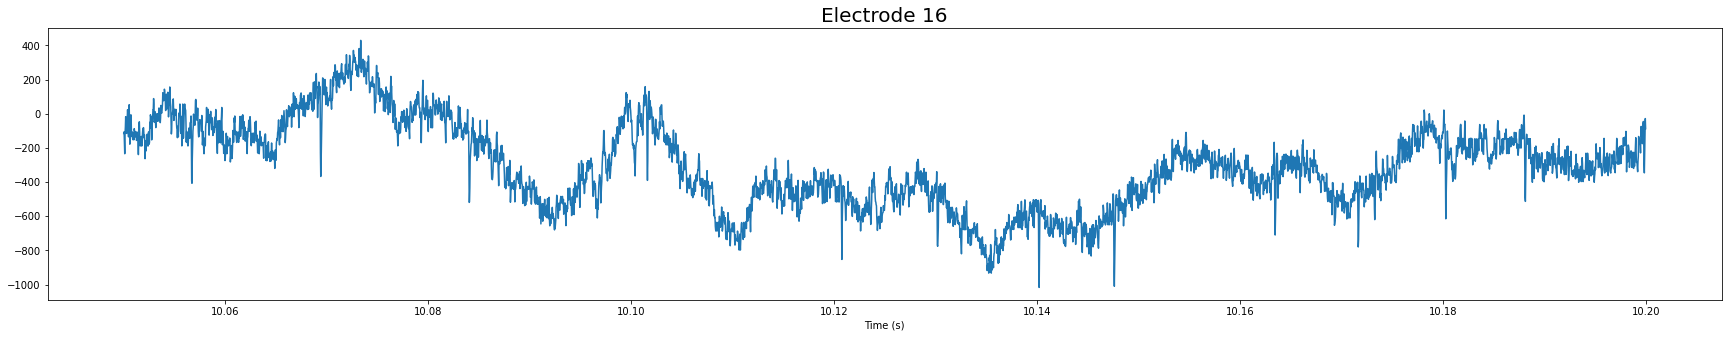

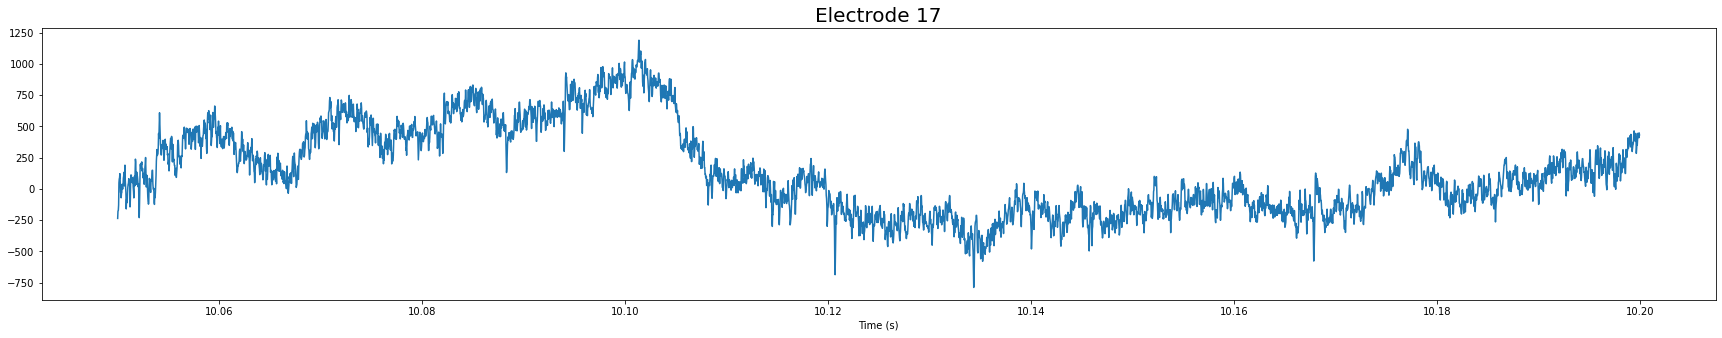

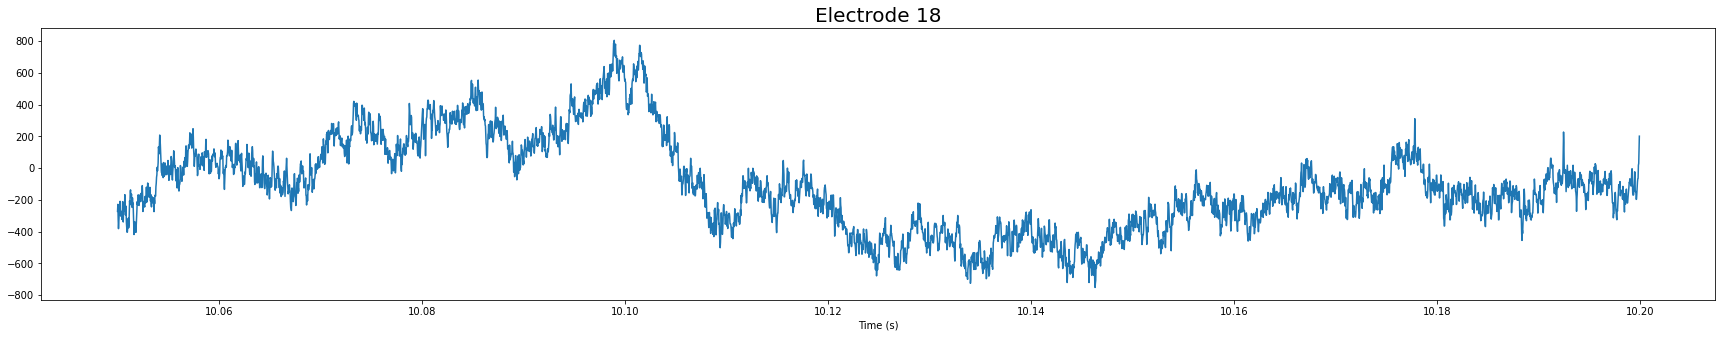

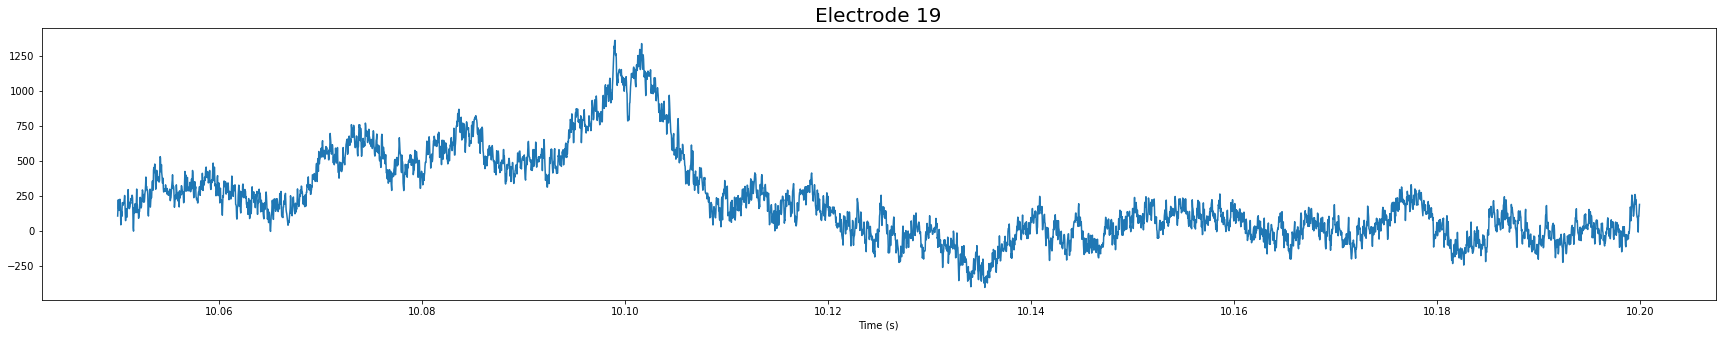

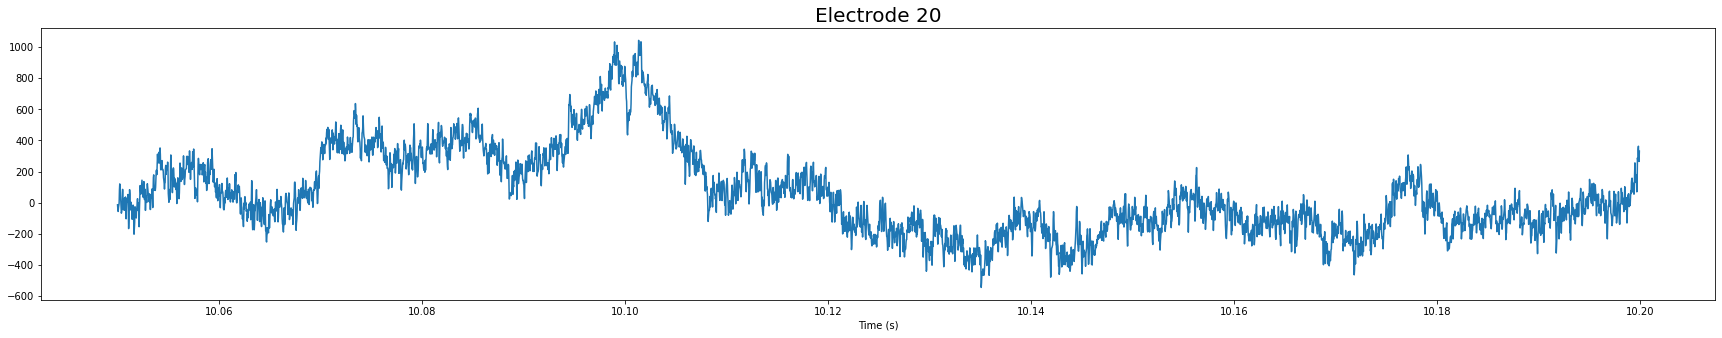

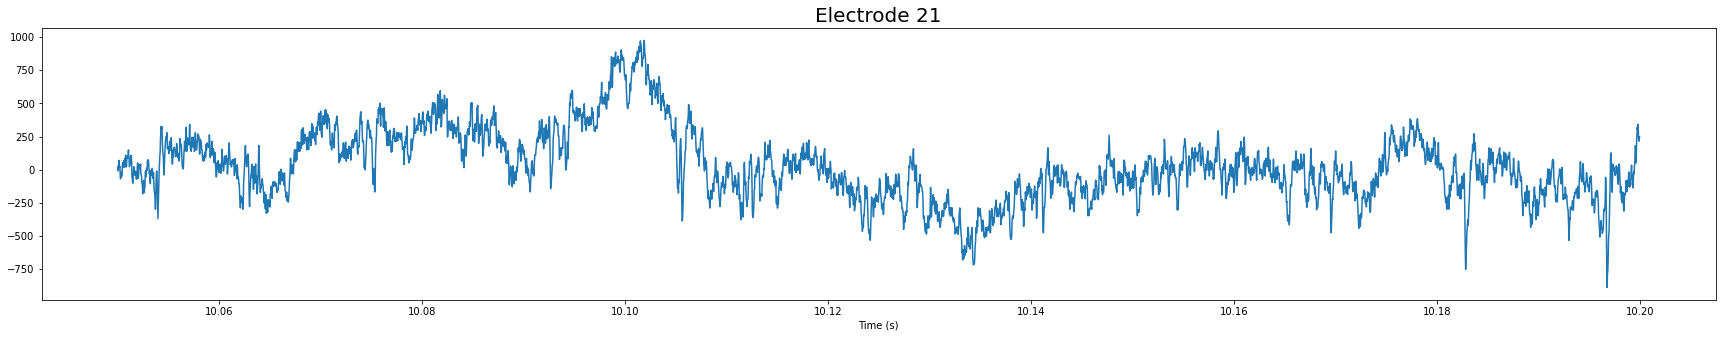

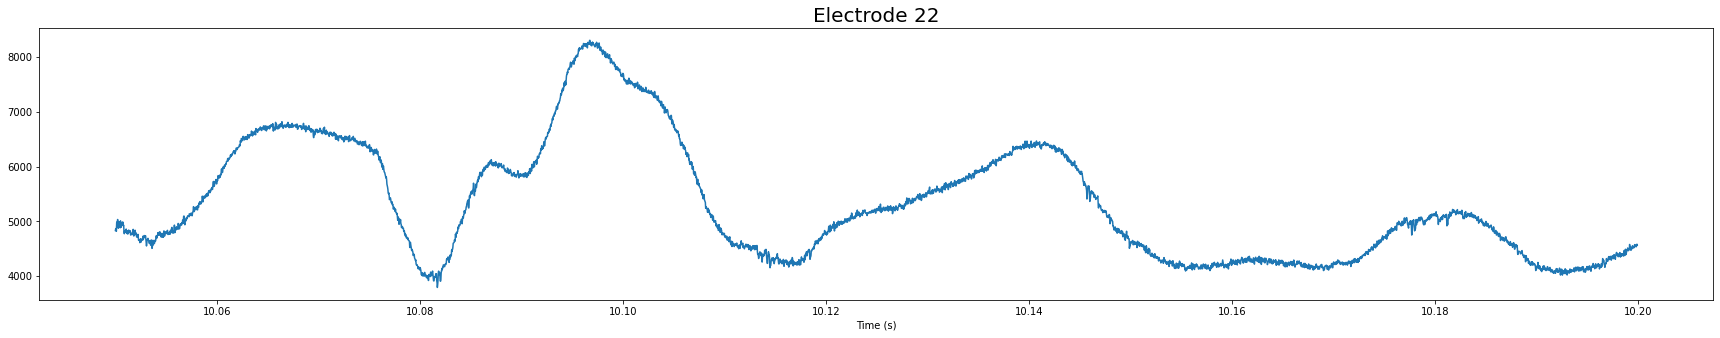

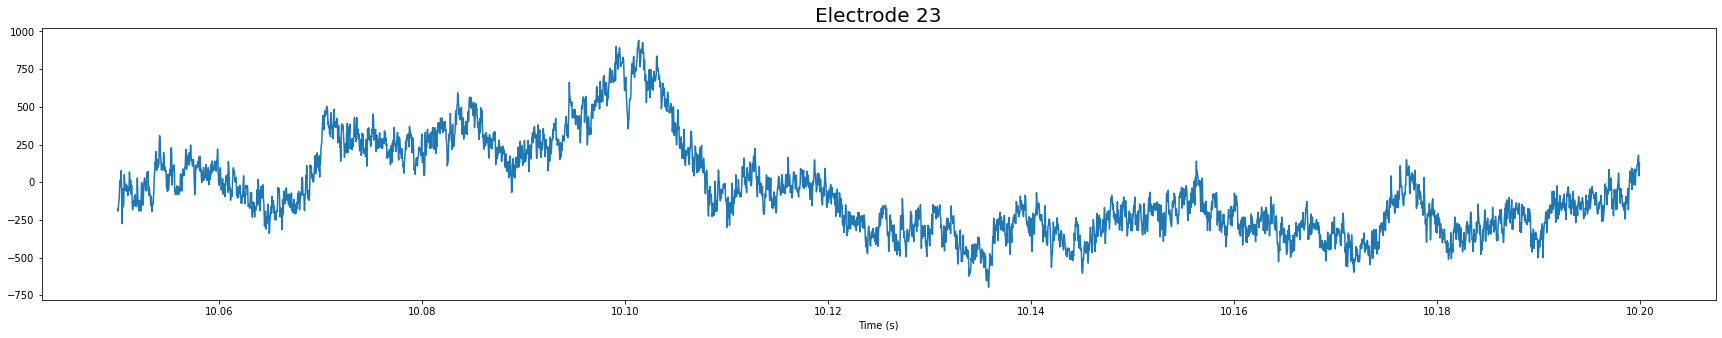

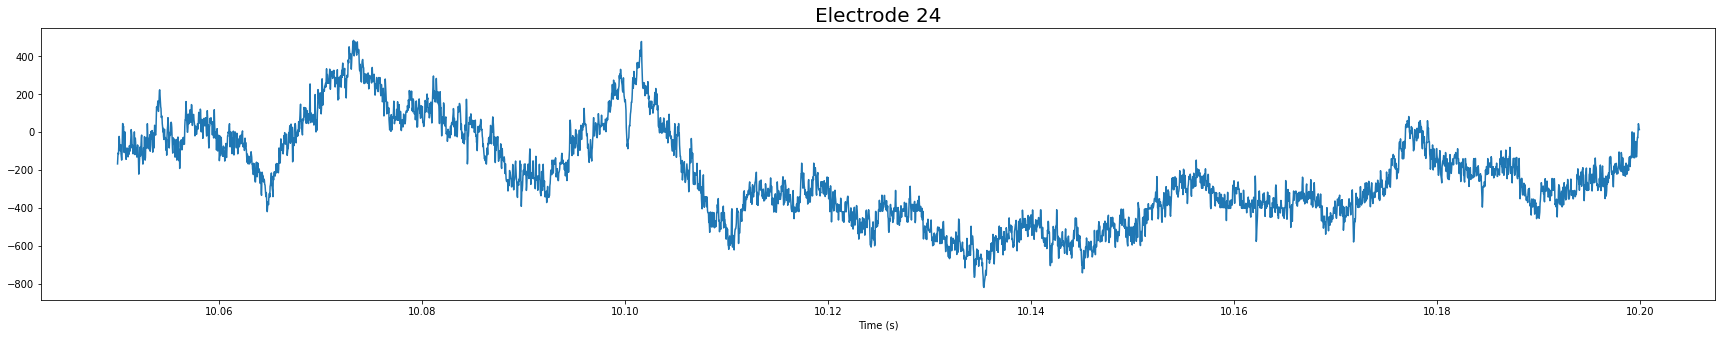

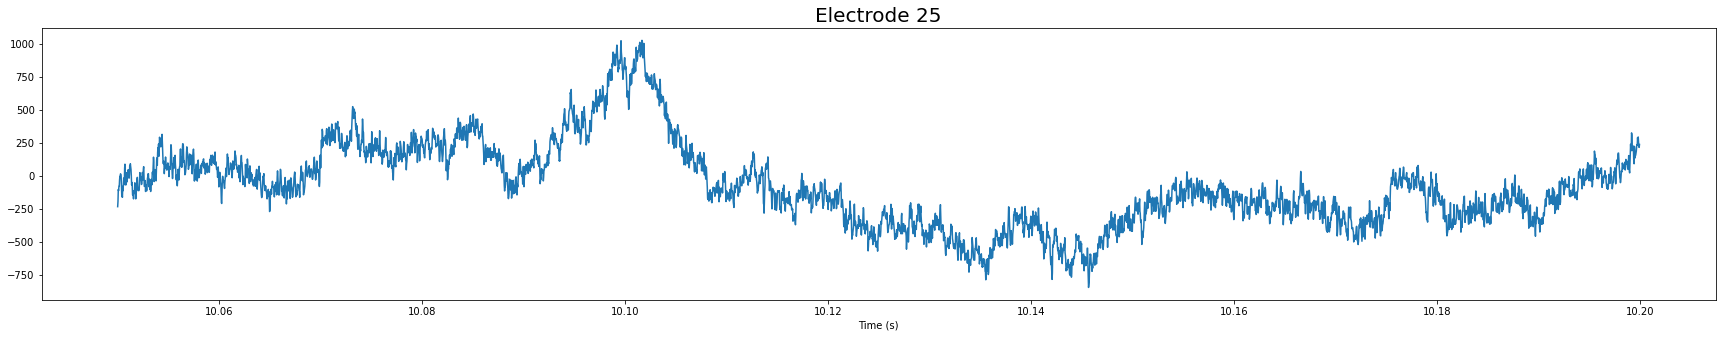

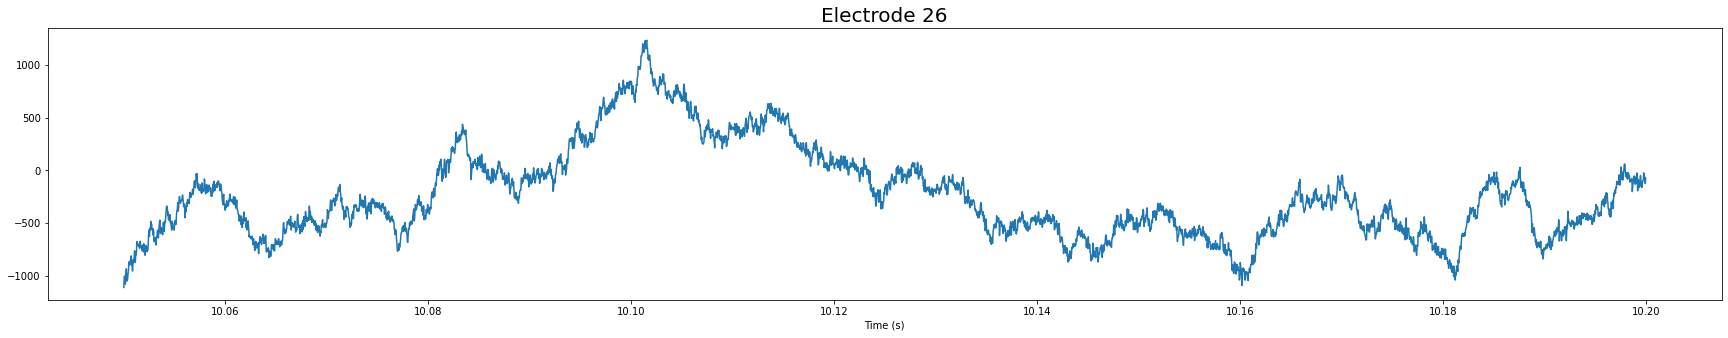

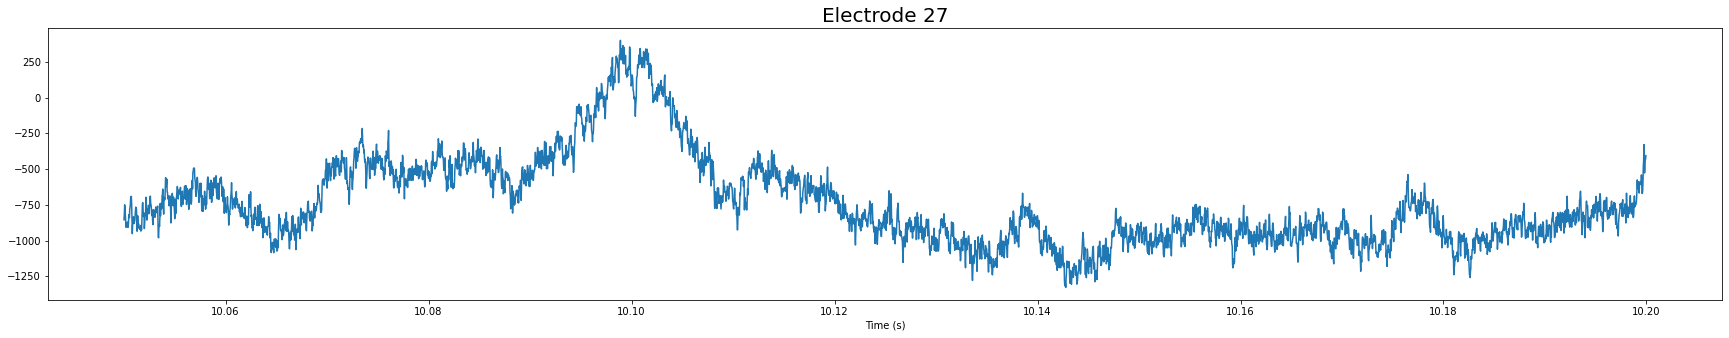

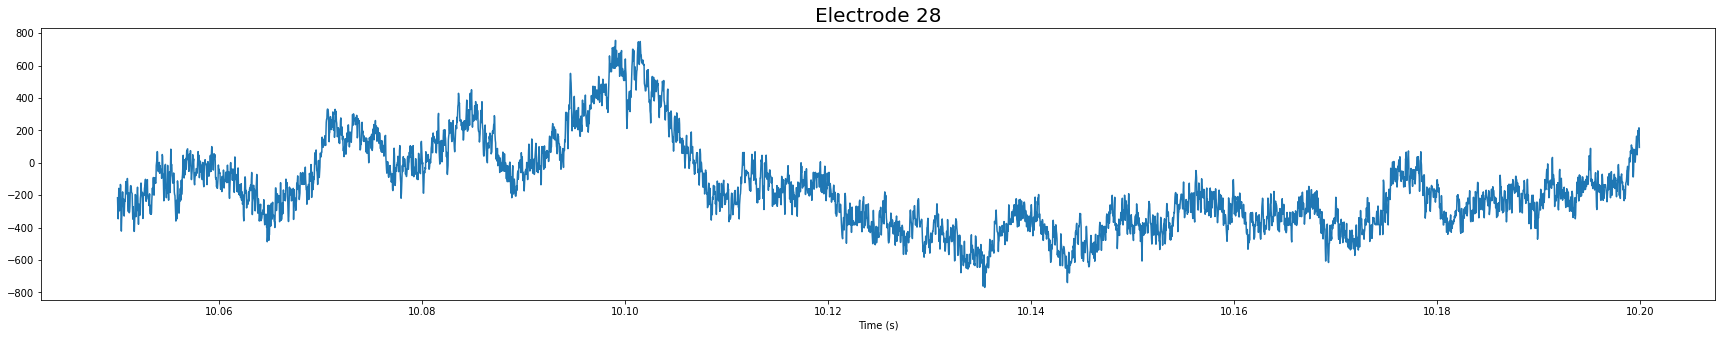

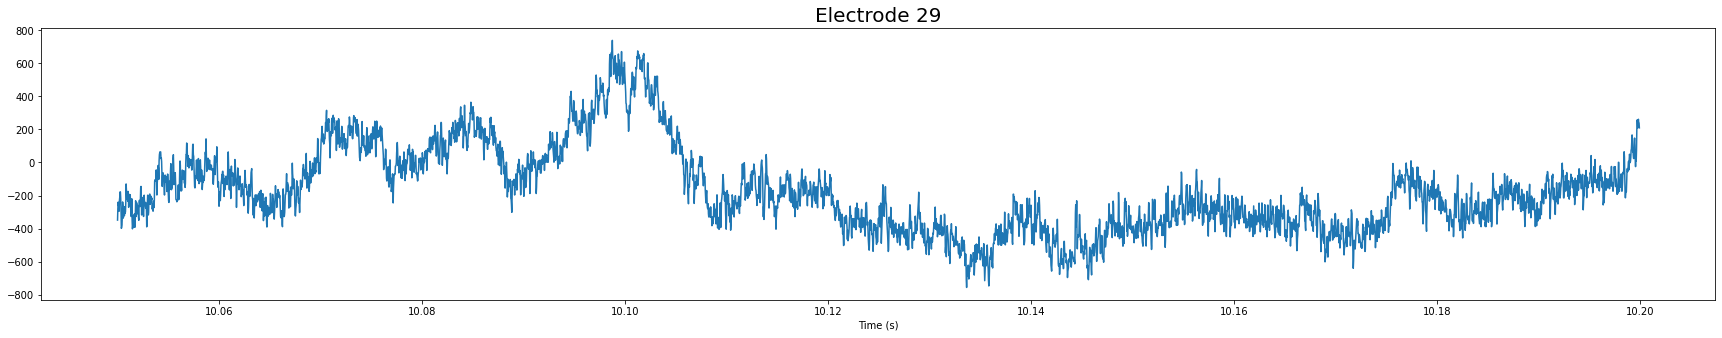

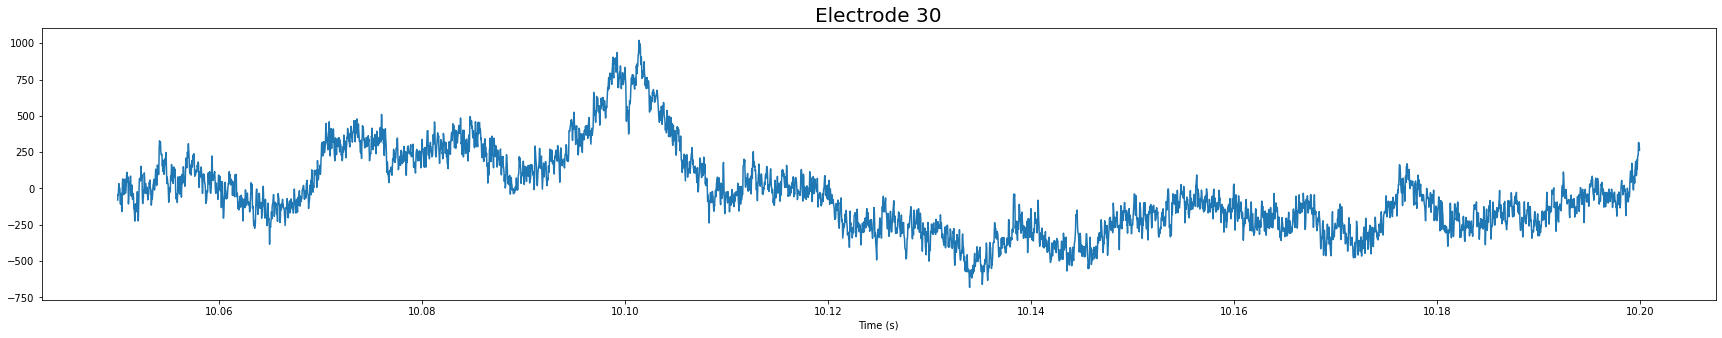

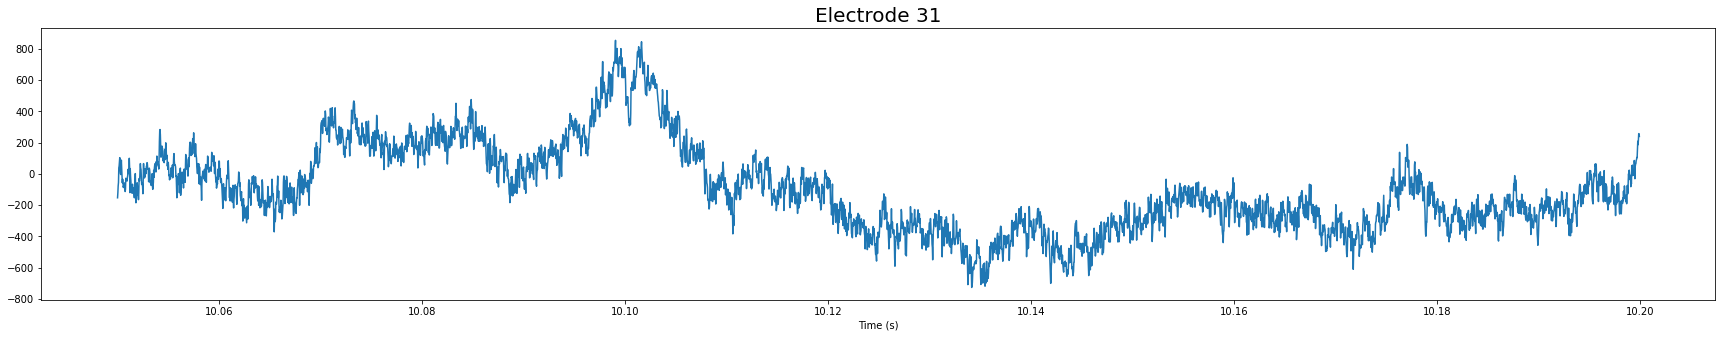

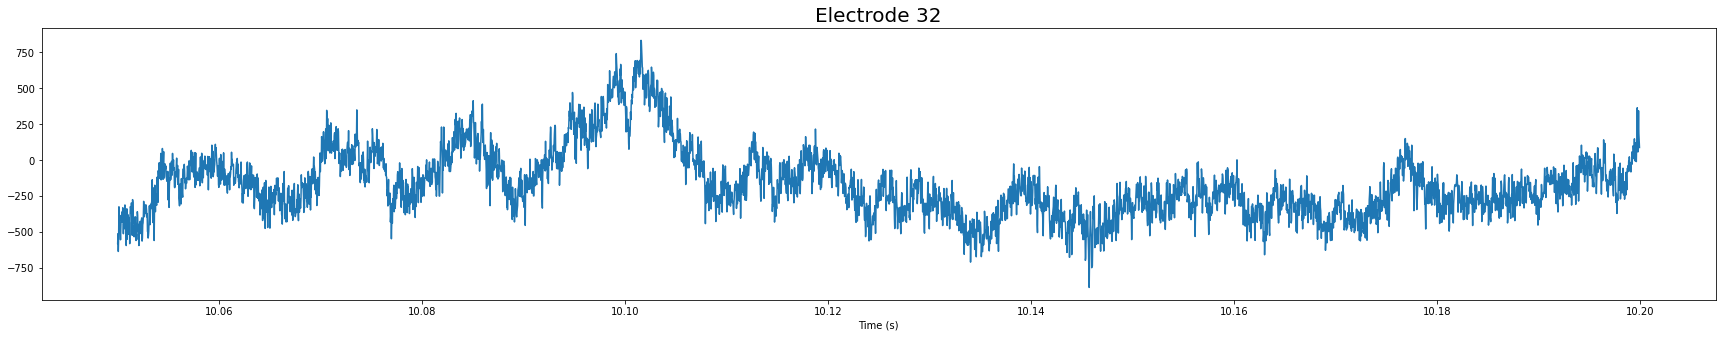

ThemisDB.csv has been updated


In [8]:
badElecList =[]
# Present all electrodes
for elec in elecList:
    showElectrode(os.path.join(inDir+"binNew","Elec"+str(elec)+rangeStr+".bin"),elec)
    # Ask for an answer from the user
    result = input("Enter good/bad: ")
    if str(result)=="bad":
        badElecList.append(elec)
        # remove bad electrode from elecList
        elecList.remove(elec)
# updates the bad electrodes
basicRow.update({"Bad electrodes":badElecList})
updateDB(basicRow)

d:\users\matan\documents\pycharmprojects\preprocess\venv\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]


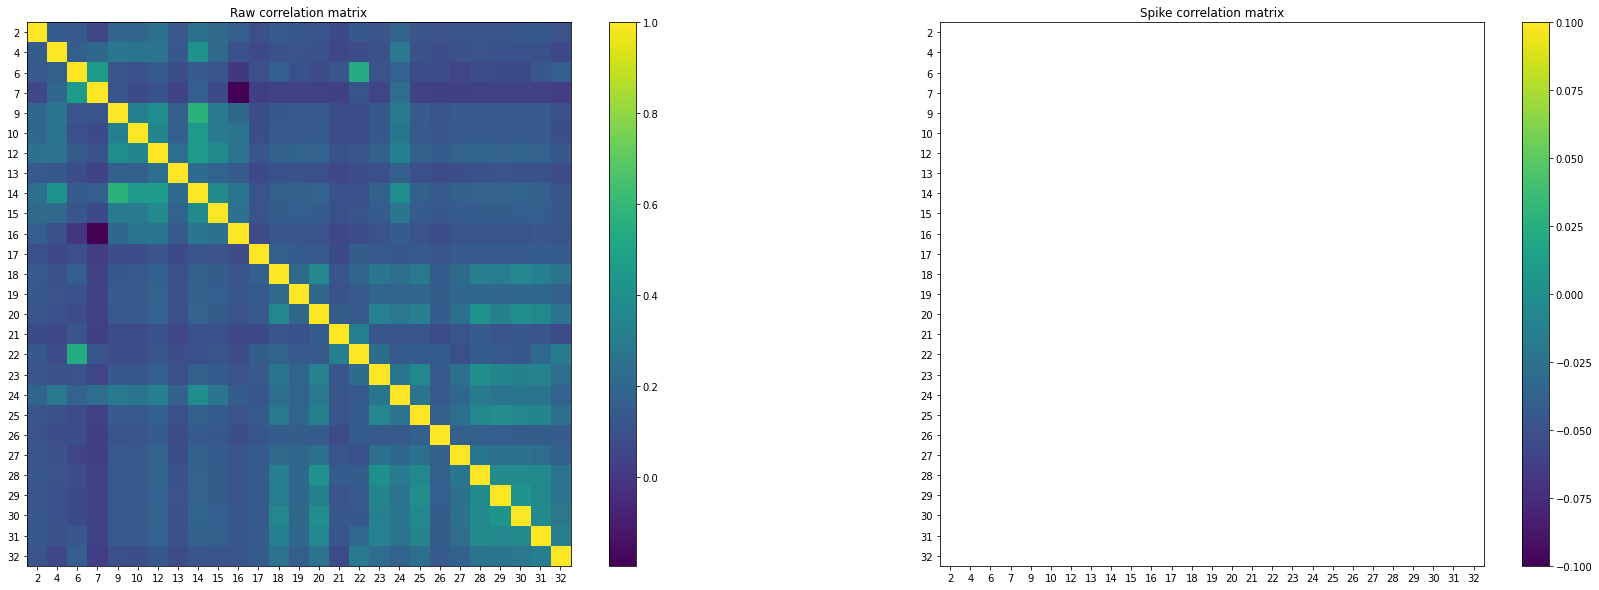

ThemisDB.csv has been updated


In [9]:
ccr, ccf = pp.plot_corr_mat(inDir,rangeStr,elecList,raw_fold="binNew")
matplotlib.pyplot.show()
result = input("Enter channels with crosstalk (a,b,c...) or write stop to finish: ")
lisOfNumLists = []
while result != "stop":
    # split the result by ','
    strList = result.split(',')
    try:
        # try to convert each string to an int
        numList = list(map(lambda string: int(string), strList))
        lisOfNumLists.append(numList)
    except ValueError:
        # if not all strings can be converted, print an error message
        print("Not all values are numbers! Please enter again")
    # ask for a user input again
    result = input("Enter channels with crosstalk (a,b,c...) or write stop to finish: ")
# update the DB
basicRow.update({"Crosstalk": lisOfNumLists})
updateDB(basicRow)

In [ ]:
pp.remMedian(inDir + "binBand\\", inDir + "binMed\\", elecList, rangeStr)
basicRow.update({"median": elecList.__len__()})
updateDB(basicRow)
print(str(elecList.__len__()) + " files removed their median successfully")

